# CAP4613 Homework 2

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# plt.style.use('seaborn-v0_8-bright')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
def g(x):
    return np.sin(np.pi/4 * x)


num_train = 200
x_train = np.linspace(-2, 2, num_train)
y_train = g(x_train)

x_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

In [ ]:
class Net(nn.Module):
    def __init__(self, hidden_size=10):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        hidden = self.fc1(x)

        hidden_act = self.relu(hidden)
        out = self.fc2(hidden_act)
        return out

    def get_activation_pattern(self, x):
        # Returns the binary activation pattern for the hidden layer
        hidden = self.fc1(x)
        pattern = (hidden > 0).float()  # 1 if active, 0 if not
        return pattern

In [ ]:
model = Net(hidden_size=10)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()


num_epochs = 2000 
training_errors = []
avg_errors = []
max_errors = []
hamming_distances = []

x_eval = np.linspace(-2, 2, 400)
x_eval_tensor = torch.tensor(x_eval, dtype=torch.float32).unsqueeze(1)
y_eval = g(x_eval)


for epoch in range(num_epochs):
    model.train()
    
    # Recording activation patterns at the beginning of the epoch
    pattern_begin = model.get_activation_pattern(x_train_tensor).detach()
    

    optimizer.zero_grad()
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    model.eval()

    training_errors.append(loss.item())
    
    with torch.no_grad():
        y_pred = model(x_eval_tensor).squeeze().numpy()
    error = np.abs(y_pred - y_eval)
    avg_error = np.mean(error)
    max_error = np.max(error)
    avg_errors.append(avg_error)
    max_errors.append(max_error)
    

    pattern_end = model.get_activation_pattern(x_train_tensor).detach()
    
    # Computing total Hamming distance
    hamming = torch.sum(torch.abs(pattern_begin - pattern_end)).item()
    hamming_distances.append(hamming)
    
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{num_epochs} - Loss: {loss.item():.4f}, Avg error: {avg_error:.4f}, Max error: {max_error:.4f}")

Epoch 100/2000 - Loss: 0.0050, Avg error: 0.0614, Max error: 0.2027
Epoch 200/2000 - Loss: 0.0015, Avg error: 0.0293, Max error: 0.1458
Epoch 300/2000 - Loss: 0.0007, Avg error: 0.0196, Max error: 0.1103
Epoch 400/2000 - Loss: 0.0005, Avg error: 0.0165, Max error: 0.0896
Epoch 500/2000 - Loss: 0.0004, Avg error: 0.0147, Max error: 0.0764
Epoch 600/2000 - Loss: 0.0003, Avg error: 0.0134, Max error: 0.0667
Epoch 700/2000 - Loss: 0.0002, Avg error: 0.0119, Max error: 0.0590
Epoch 800/2000 - Loss: 0.0002, Avg error: 0.0103, Max error: 0.0527
Epoch 900/2000 - Loss: 0.0001, Avg error: 0.0085, Max error: 0.0474
Epoch 1000/2000 - Loss: 0.0001, Avg error: 0.0074, Max error: 0.0429
Epoch 1100/2000 - Loss: 0.0001, Avg error: 0.0068, Max error: 0.0390
Epoch 1200/2000 - Loss: 0.0001, Avg error: 0.0064, Max error: 0.0358
Epoch 1300/2000 - Loss: 0.0001, Avg error: 0.0061, Max error: 0.0330
Epoch 1400/2000 - Loss: 0.0001, Avg error: 0.0059, Max error: 0.0307
Epoch 1500/2000 - Loss: 0.0001, Avg error: 

## 1

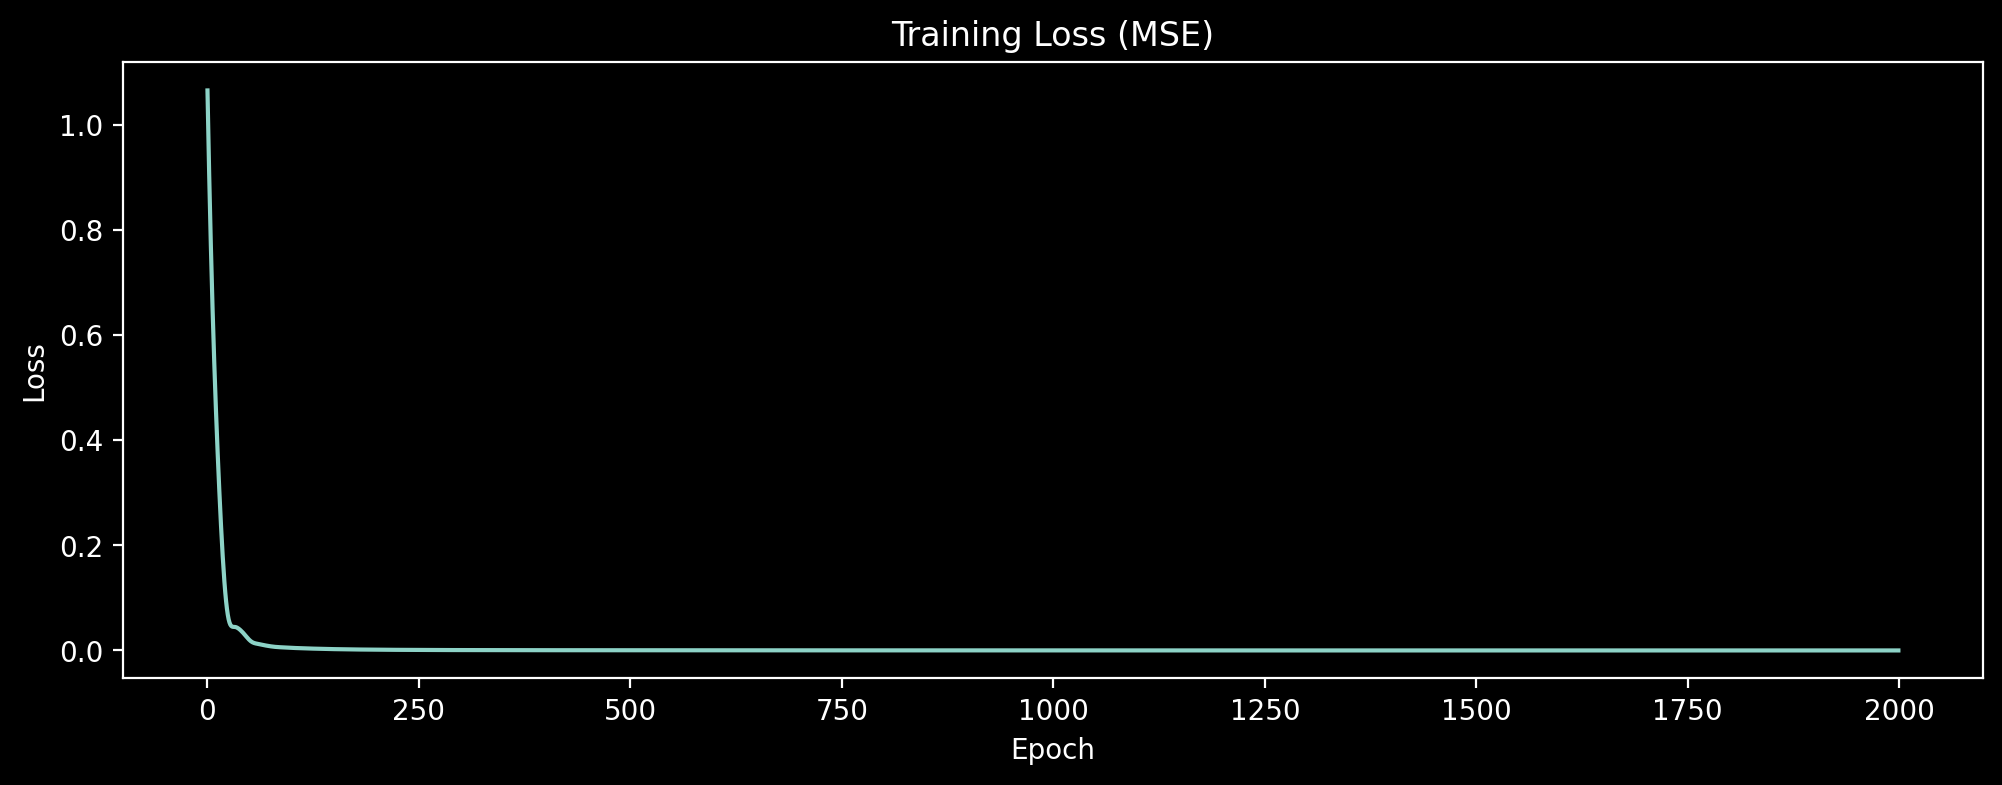

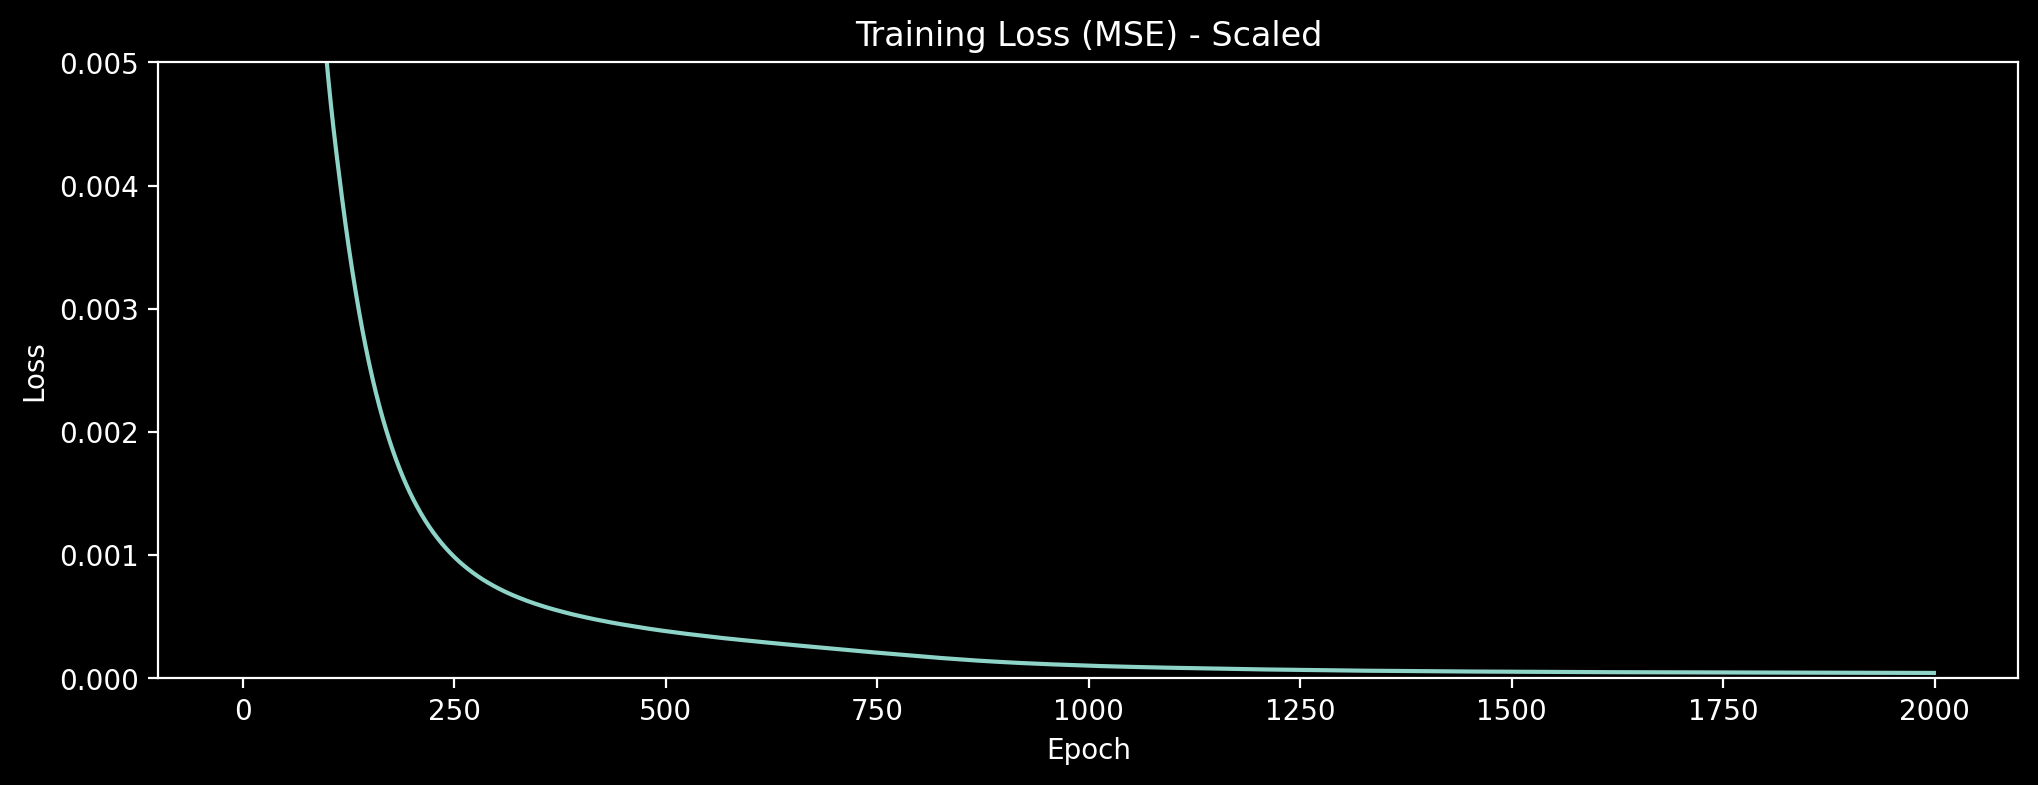

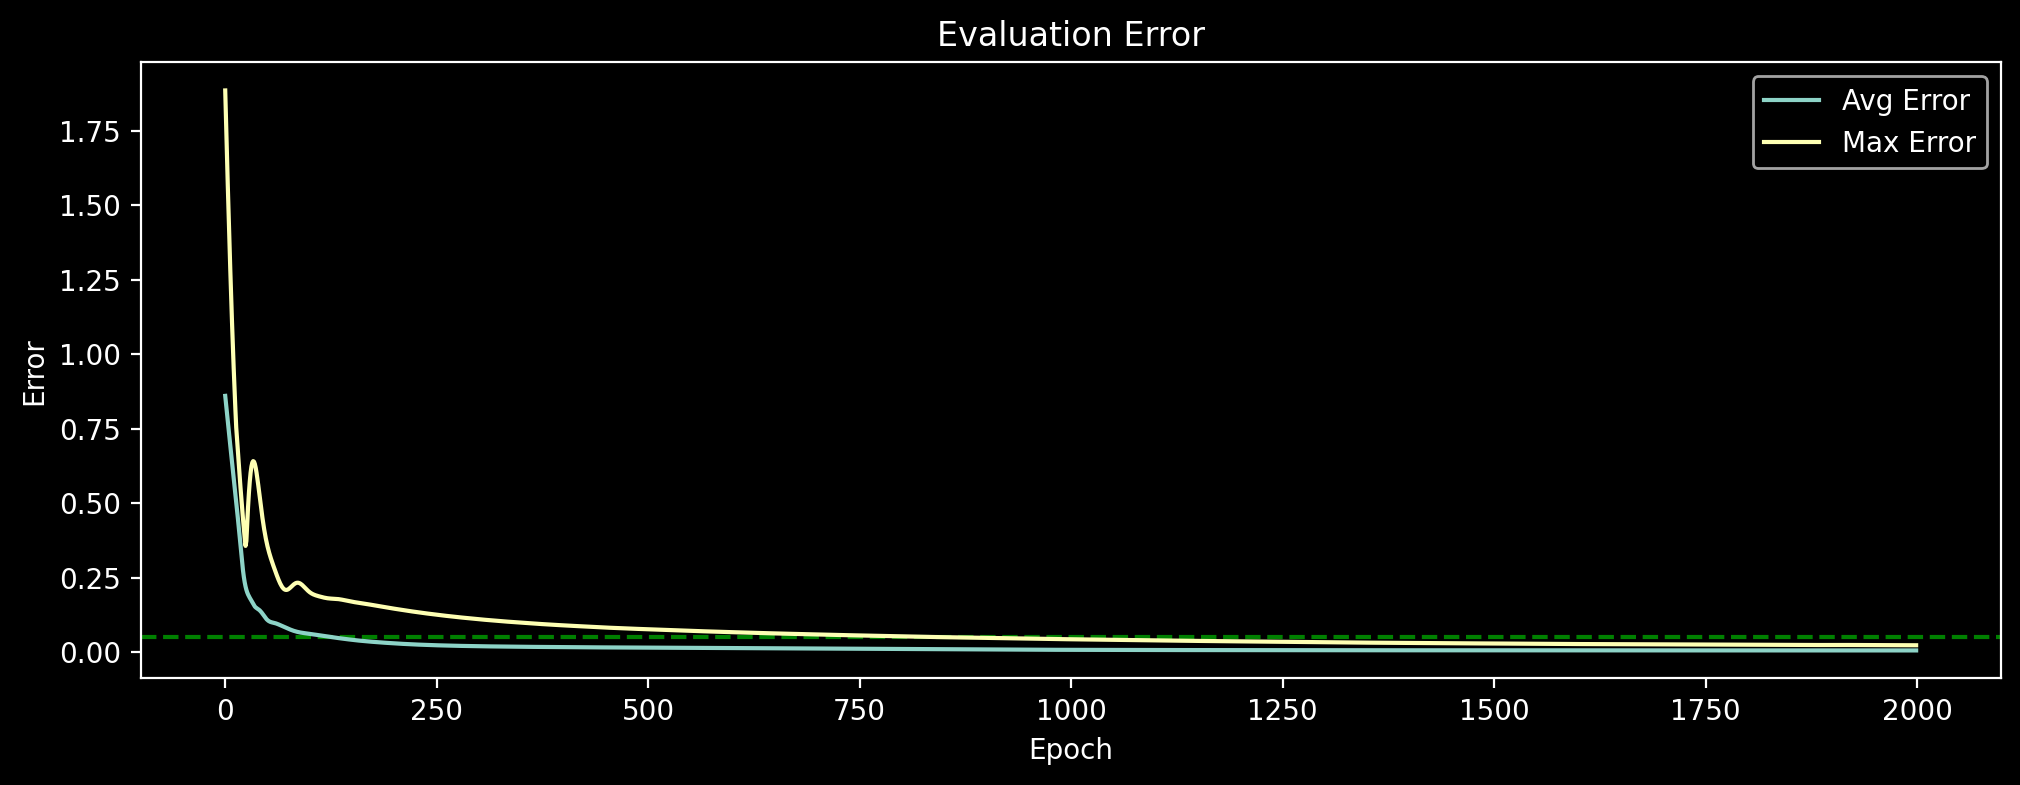

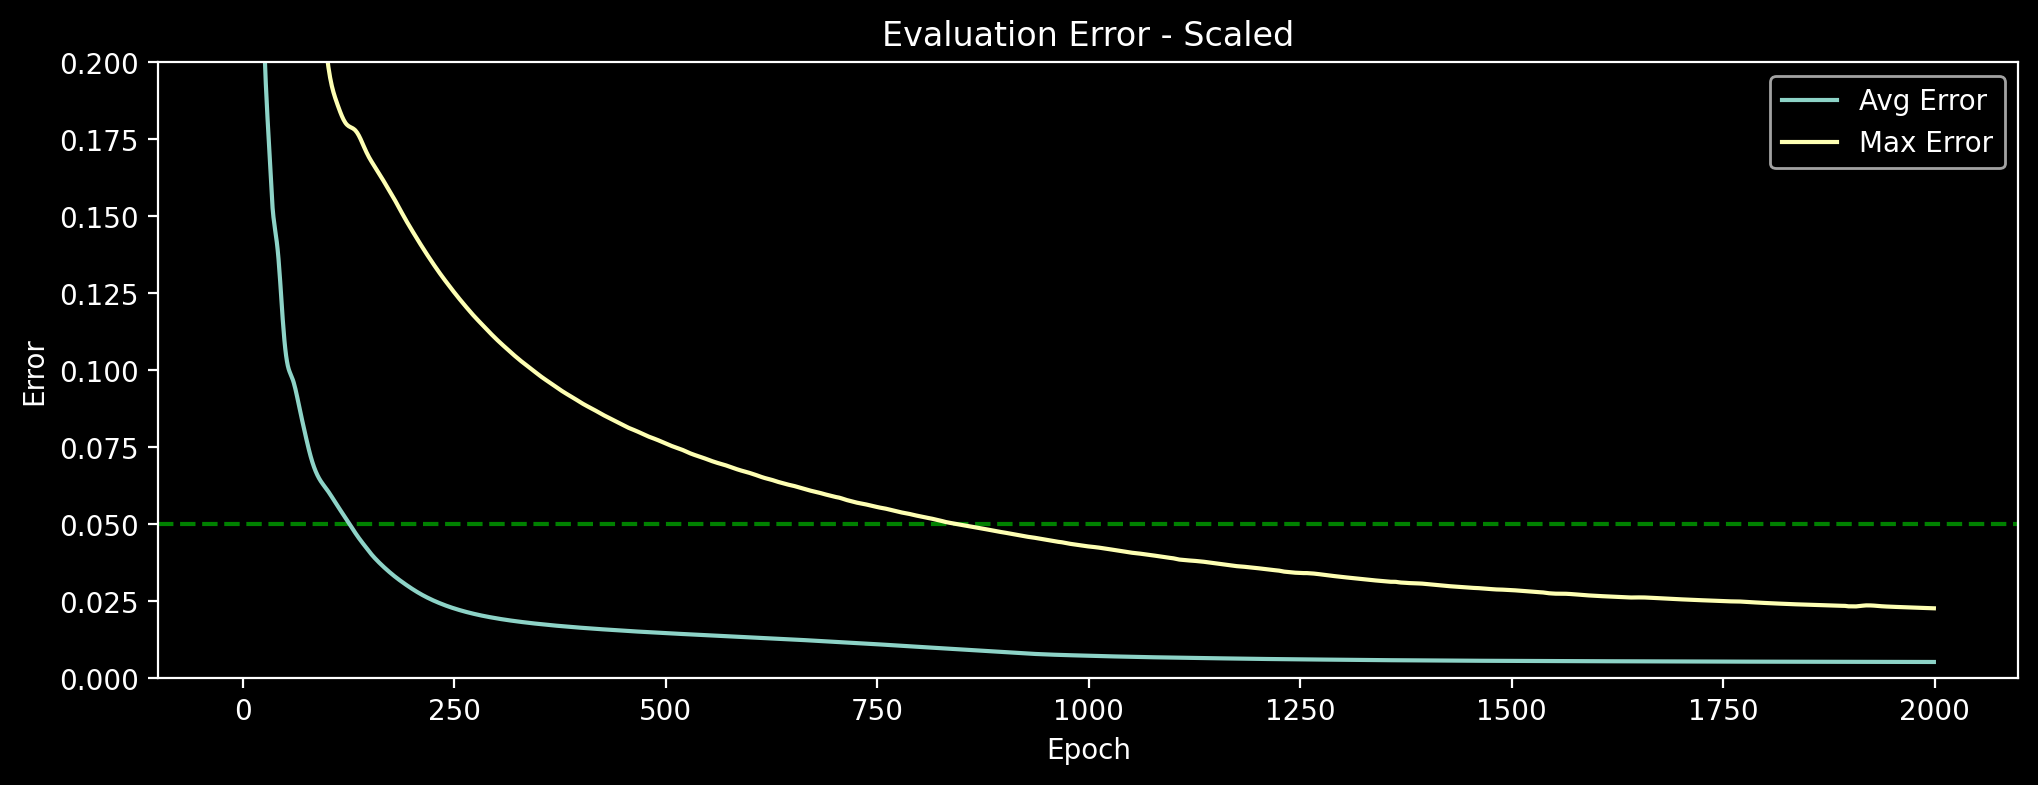

In [ ]:
plt.figure(figsize=(12, 4))


plt.plot(training_errors)

plt.title("Training Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")


plt.figure(figsize=(12, 4))
plt.plot(training_errors)
plt.ylim(0, 0.005)
plt.title("Training Loss (MSE) - Scaled")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.figure(figsize=(12, 4))
# plt.subplot(1, 3, 2)
# plt.ylim(0, 0.2)
plt.axhline(0.05, color='g', linestyle='--')
plt.plot(avg_errors, label="Avg Error")
plt.plot(max_errors, label="Max Error")
plt.title("Evaluation Error")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()

plt.figure(figsize=(12, 4))
# plt.subplot(1, 3, 2)
plt.ylim(0, 0.2)
plt.axhline(0.05, color='g', linestyle='--')
plt.plot(avg_errors, label="Avg Error")
plt.plot(max_errors, label="Max Error")
plt.title("Evaluation Error - Scaled")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()

## 2

<Figure size 1000x400 with 0 Axes>

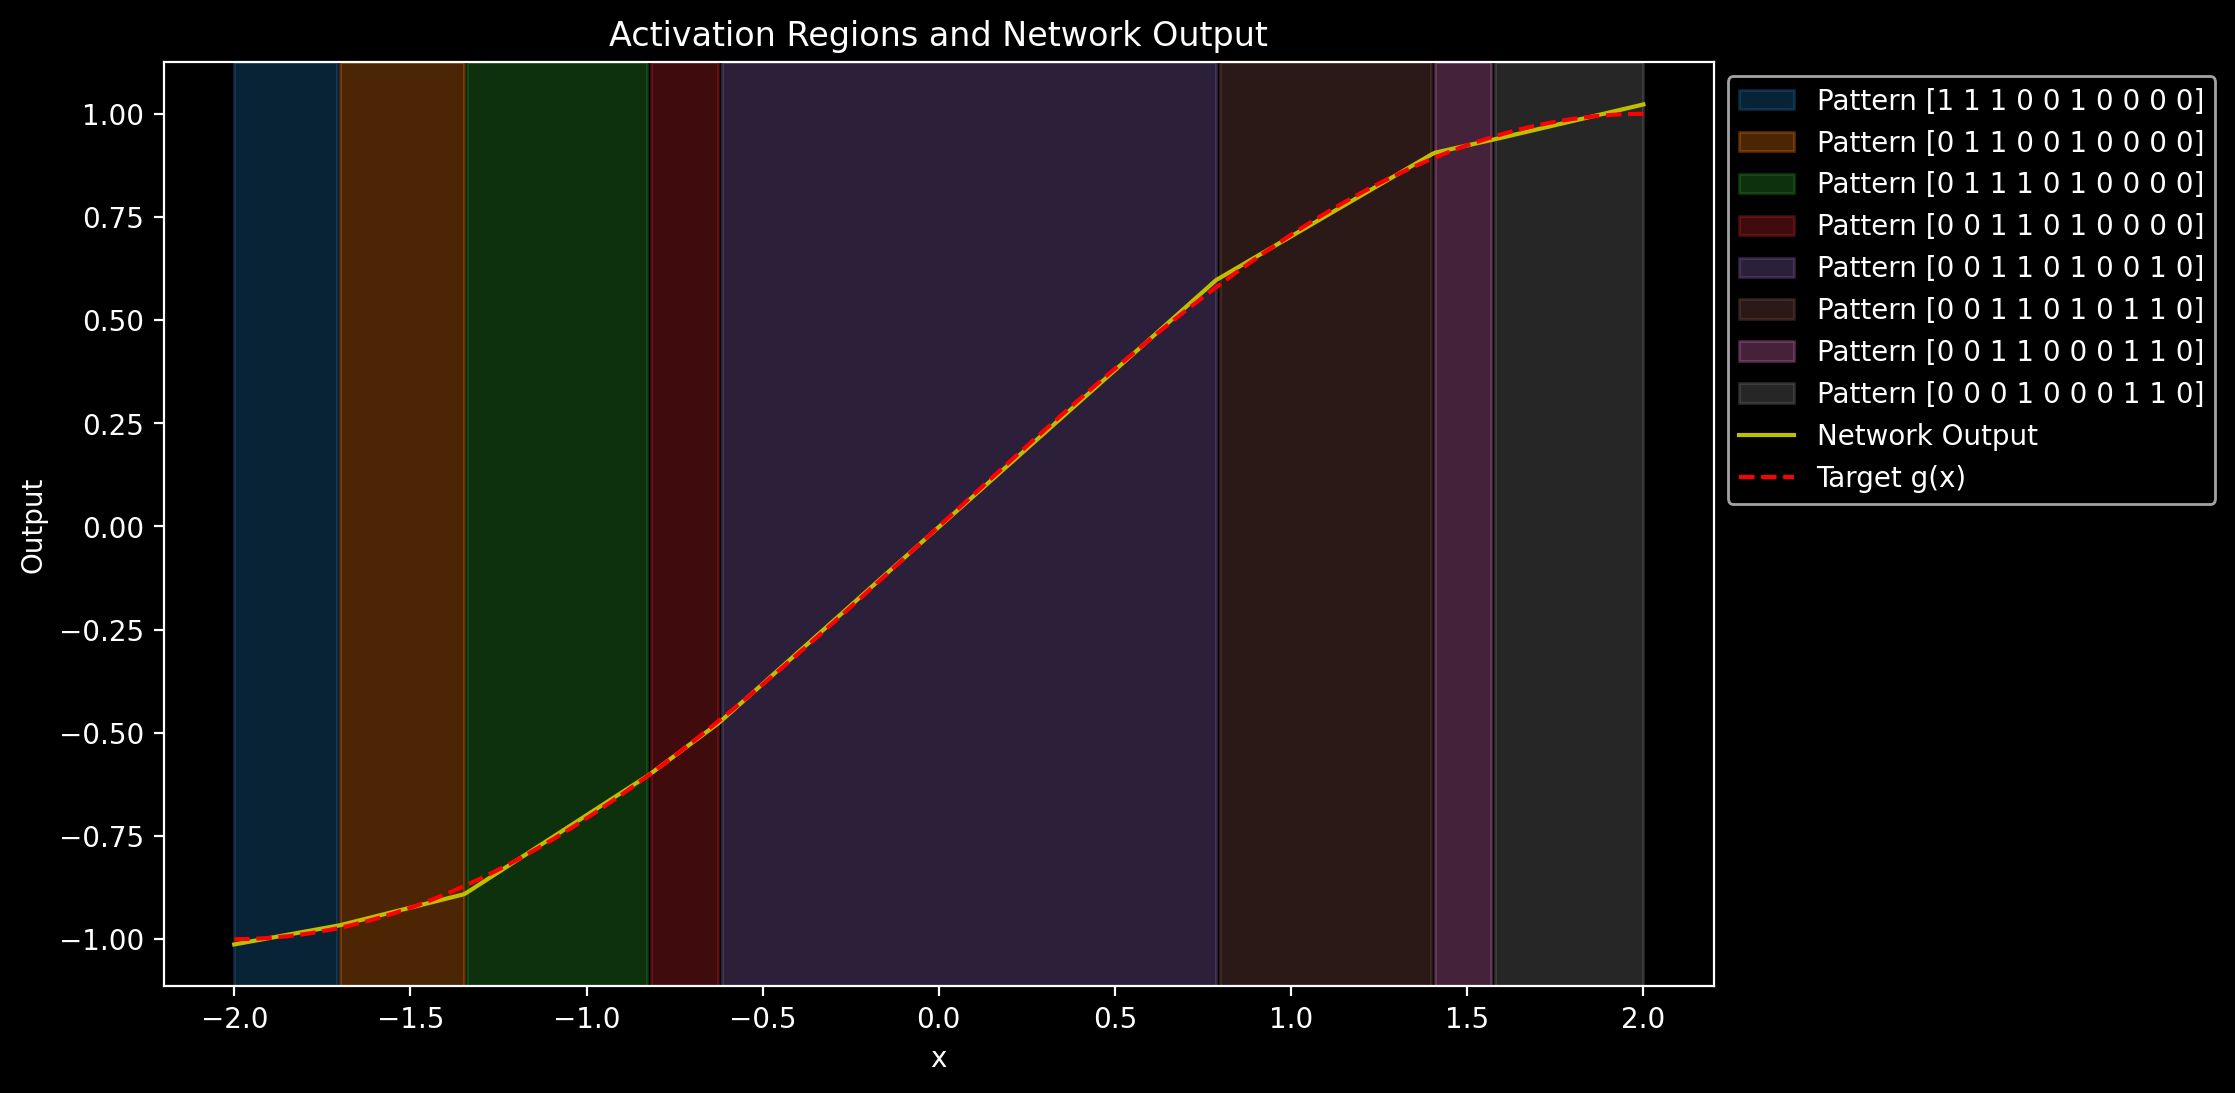

Activation Regions and Patterns:
Region x in [-2.000, -1.709]: Pattern [1 1 1 0 0 1 0 0 0 0]
Region x in [-1.699, -1.348]: Pattern [0 1 1 0 0 1 0 0 0 0]
Region x in [-1.338, -0.827]: Pattern [0 1 1 1 0 1 0 0 0 0]
Region x in [-0.817, -0.627]: Pattern [0 0 1 1 0 1 0 0 0 0]
Region x in [-0.617, 0.787]: Pattern [0 0 1 1 0 1 0 0 1 0]
Region x in [0.797, 1.398]: Pattern [0 0 1 1 0 1 0 1 1 0]
Region x in [1.409, 1.569]: Pattern [0 0 1 1 0 0 0 1 1 0]
Region x in [1.579, 2.000]: Pattern [0 0 0 1 0 0 0 1 1 0]


In [ ]:
activation_patterns = []
for x_val in x_eval:
    x_tensor = torch.tensor([[x_val]], dtype=torch.float32)
    pattern = tuple(model.get_activation_pattern(x_tensor).detach().numpy().flatten().astype(int))
    activation_patterns.append(pattern)

activation_patterns = np.array(activation_patterns) 

regions = []
current_pattern = activation_patterns[0]
start = x_eval[0]
for i in range(1, len(x_eval)):
    if not np.array_equal(activation_patterns[i], current_pattern):
        end = x_eval[i-1]
        regions.append((start, end, current_pattern))
        start = x_eval[i]
        current_pattern = activation_patterns[i]

regions.append((start, x_eval[-1], current_pattern))


# different region colors
plt.figure(figsize=(10, 4))
colors = list(mcolors.TABLEAU_COLORS.values())
pattern_colors = {}
color_index = 0
plt.figure(figsize=(10, 6))
for region in regions:
    reg_start, reg_end, pattern = region

    pattern_str = str(pattern)
    if pattern_str not in pattern_colors:

        pattern_colors[pattern_str] = colors[color_index % len(colors)]
        color_index += 1
    plt.axvspan(reg_start, reg_end, alpha=0.3, color=pattern_colors[pattern_str],
                label=f"Pattern {pattern_str}")



plt.plot(x_eval, model(x_eval_tensor).detach().numpy(), 'y-', label="Network Output")
plt.plot(x_eval, np.sin(np.pi/4 * x_eval), 'r--', label="Target g(x)")
plt.title("Activation Regions and Network Output")
plt.xlabel("x")
plt.ylabel("Output")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


print("Activation Regions and Patterns:")
for region in regions:
    reg_start, reg_end, pattern = region
    print(f"Region x in [{reg_start:.3f}, {reg_end:.3f}]: Pattern {pattern}")


## 3

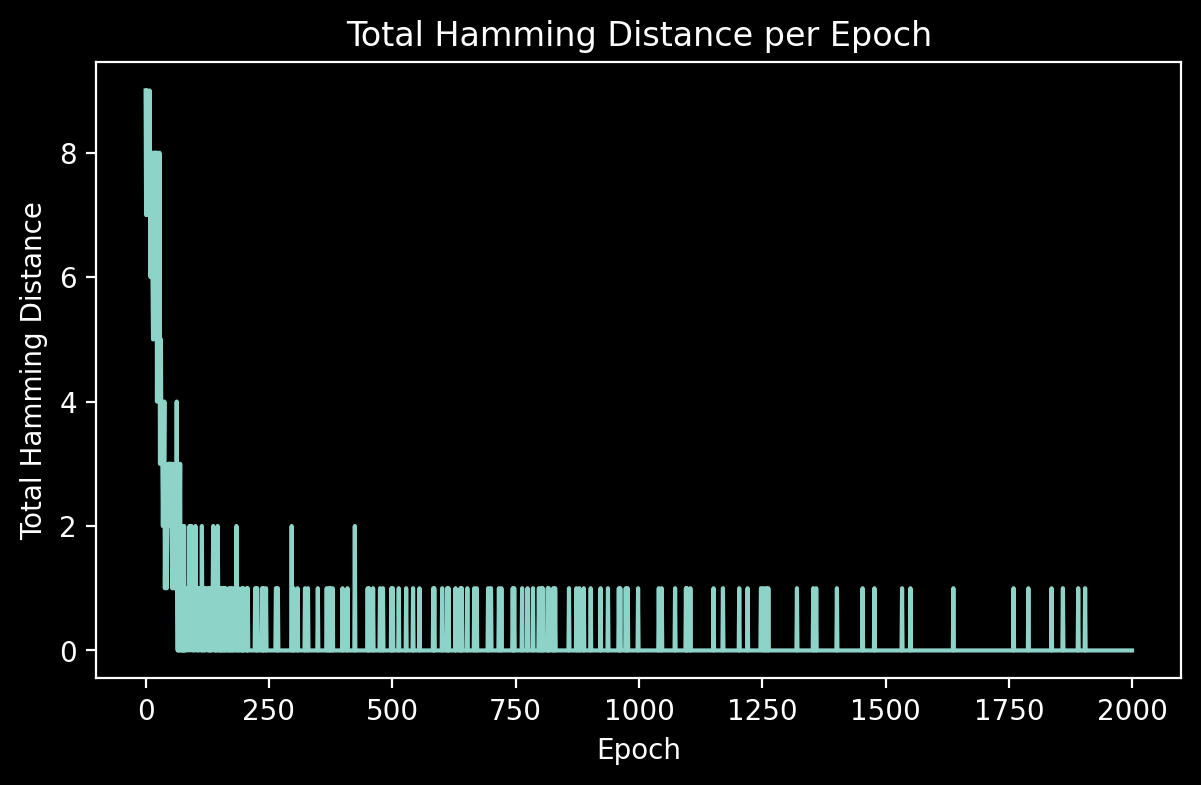

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(hamming_distances)
plt.title("Total Hamming Distance per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Total Hamming Distance")
plt.show()

In [35]:
df_ = pd.DataFrame(pd.Series(hamming_distances))

In [36]:
df_.describe()

,0
count,2000.000000
mean,0.180000
std,0.804316
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,13.000000
